In [2]:
import numpy as np
import pandas as pd
import random as random

In [16]:
df = pd.read_csv("dataset/TC-dataset.csv", sep="\t",index_col=0)

## Country Missing Values

In [17]:
#Numero di righe con country Unspecified
print("Numero di Unspecified: " + str(len(df[df["CustomerCountry"].str.contains("Unspecified")])))

#Numero di righe con country European Community
print("Numero di European Community: " + str(len(df[df["CustomerCountry"].str.contains("European Community")])))

Numero di Unspecified: 340
Numero di European Community: 61


In [18]:
#Moda di CustomerCountry
moda = df['CustomerCountry'].mode()[0]
print("Moda: " + str(moda))


df["CustomerCountry"].replace({"Unspecified": moda}, inplace=True)
df["CustomerCountry"].replace({"European Community": moda}, inplace=True)

print("Numero di Unspecified: " + str(len(df[df["CustomerCountry"].str.contains("Unspecified")])))
print("Numero di European Community: " + str(len(df[df["CustomerCountry"].str.contains("European Community")])))

Moda: United Kingdom
Numero di Unspecified: 0
Numero di European Community: 0


## Missing Values CustomerID

In [19]:
print("Numero di European Community: " + str(len(df[df["CustomerID"].isnull()])))

Numero di European Community: 65080


In [20]:

#Generazione dei nuovi CustomerID
basket_list_customer_null=df[df["CustomerID"].isnull()].BasketID.unique()
new_customer_per_basket_list=random.sample(range(1, 100000), len(basket_list_customer_null))

#Inserimento dei customer id con il contrassegno N per il riconoscimento
for i, elem in enumerate(basket_list_customer_null):
    df["CustomerID"][df.BasketID==elem]=str(new_customer_per_basket_list[i])+"N"

In [21]:
print("Numero di European Community: " + str(len(df[df["CustomerID"].isnull()])))

Numero di European Community: 0


## Salvataggio DataFrame senza Missing Values

In [ ]:
#df.to_csv('dataset/TC-dataset.csv', sep='\t',decimal=",")

In [19]:
df = pd.read_csv("dataset/CS1-dataset.csv", sep="\t", index_col=0, decimal=",")
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5575 entries, 0 to 5574
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5575 non-null   object 
 1   I           5575 non-null   int64  
 2   Iu          5575 non-null   int64  
 3   Imax        5575 non-null   int64  
 4   E           5575 non-null   float64
 5   PIL         5575 non-null   float64
 6   Mb          5575 non-null   float64
 7   Ts          5575 non-null   float64
 8   MeanD       5575 non-null   float64
 9   MaxD        5575 non-null   float64
 10  MinD        5575 non-null   float64
 11  EDate       5575 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 566.2+ KB
                   I           Iu         Imax            E          PIL  \
count    5575.000000  5575.000000  5575.000000  5575.000000  5575.000000   
mean      921.052018    58.831031    68.171659     4.747016     2.507066   
std      4171.015641    81.

In [17]:
corr_pearson=df[['I','Iu']].corr(method='spearman')
corr_spearman=df[['I','Iu']].corr(method='spearman')
corr_kendall=df[['I','Iu']].corr(method='kendall')

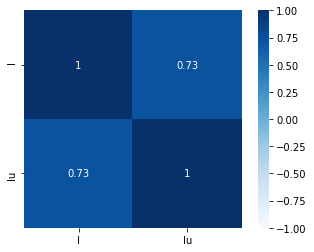

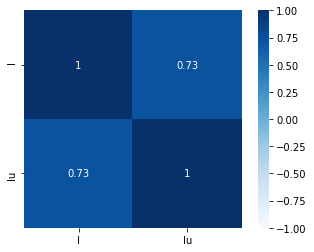

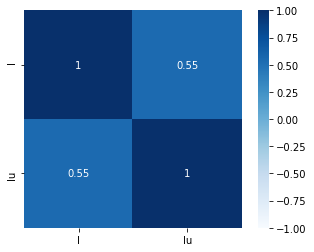

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_pearson, cmap="Blues", vmin=-1, square=True,annot=True)
plt.show()
sns.heatmap(corr_spearman, cmap="Blues", vmin=-1, square=True,annot=True)
plt.show()
sns.heatmap(corr_kendall, cmap="Blues", vmin=-1, square=True,annot=True)
plt.show()

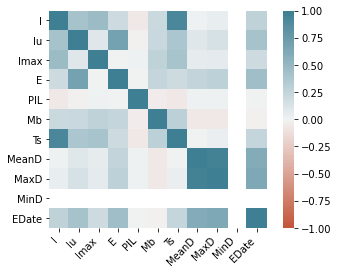

In [20]:
data = df

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Text(0.5, 1.0, 'HeatMap correlazione nuovi indicatori')

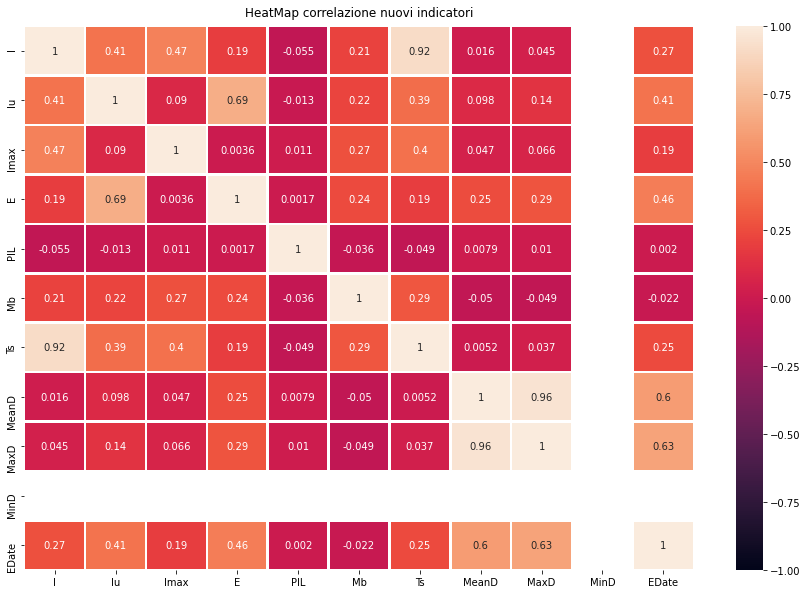

In [37]:
df.corr()
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1.5, ax= ax)
heatmap.set_title('HeatMap correlazione nuovi indicatori', fontdict={'fontsize':12}, pad=10)
